<a href="https://colab.research.google.com/github/fsrt16/Loan-Prediction/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df_t = pd.read_csv('train.csv')
df_t.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Statistical Hypothesis **

## BIVARIATE ANALYSIS    *---> w.r.t Target *

In [5]:
df_t.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
print(df_t['Gender'].unique())
print(df_t['Married'].unique())
print(df_t['Dependents'].unique())
print(df_t['Education'].unique())
print(df_t['Self_Employed'].unique())
print(df_t['Credit_History'].unique())
print(df_t['Property_Area'].unique())
print(df_t['Loan_Status'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
[ 1.  0. nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [14]:
Neg = df_t['Loan_Status'].value_counts()
print(Neg)
print("Class Discrimination Coefficient ---> " + str((Neg[1] / (Neg[1]+Neg[0]))*100))

Y    422
N    192
Name: Loan_Status, dtype: int64
Class Discrimination Coefficient ---> 31.27035830618892


<BarContainer object of 2 artists>

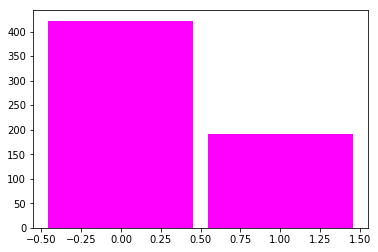

In [16]:
x=[0,1]
#tp = [Pos , Neg ]
plt.bar(x , Neg, label = 'bar count ' ,  color ='magenta' , width = 0.91)


In [18]:
df_t.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


### Categorically Dependent Variable 

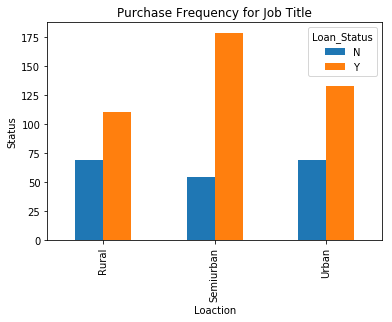

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Property_Area,,,,,
Rural,5554.083799,1645.536983,152.260116,345.531429,0.830303
Semiurban,5292.261803,1520.133047,145.504386,347.113043,0.861751
Urban,5398.247525,1716.350495,142.198953,332.800000,0.829670


In [41]:
pd.crosstab(df_t.Property_Area,df_t.Loan_Status).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Loaction')
plt.ylabel('Status')
plt.show()
df_t.groupby('Property_Area').mean()

**Semiurban Areas have high vote share for approved loan , however over rural areas the loan sanction is low **

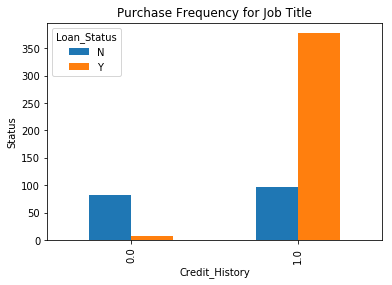

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Credit_History,,,,
0.0,5679.438202,1542.179775,146.717647,341.927711
1.0,5426.526316,1528.250358,144.786026,342.192719


In [40]:
pd.crosstab(df_t.Credit_History,df_t.Loan_Status).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Credit_History')
plt.ylabel('Status')
plt.show()
df_t.groupby('Credit_History').mean()

***The Observation with a credit history 0 is never given a loan or credit history 1 is essential for a LOAN***

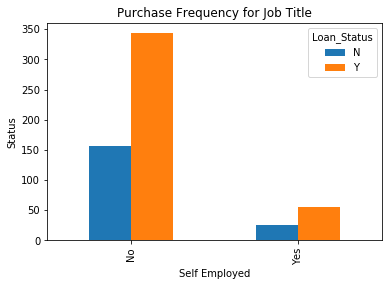

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Self_Employed,,,,,
No,5049.748000,1580.989840,141.748963,343.263804,0.835853
Yes,7380.817073,1501.341463,172.000000,336.300000,0.840000


In [39]:
pd.crosstab(df_t.Self_Employed,df_t.Loan_Status).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Self Employed')
plt.ylabel('Status')
plt.show()
df_t.groupby('Self_Employed').mean()

***Those who are not self employed , generally get a Loan easily ***

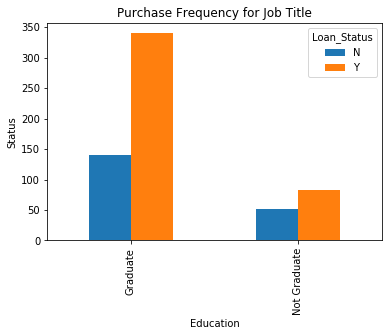

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Education,,,,,
Graduate,5857.433333,1717.474833,154.060215,344.669492,0.857788
Not Graduate,3777.283582,1276.544776,118.409449,332.156250,0.785124


In [38]:
pd.crosstab(df_t.Education,df_t.Loan_Status).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Education')
plt.ylabel('Status')
plt.show()
df_t.groupby('Education').mean()

***Graduation is a wiser criteria for loan***

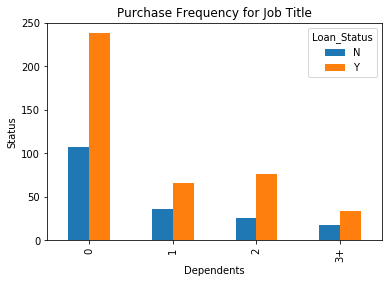

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,,,,,
0,4917.423188,1623.696000,135.886228,348.107784,0.857595
1,5962.274510,1426.235294,158.622449,329.346535,0.844444
2,4926.782178,1687.245544,150.224490,340.871287,0.852632
3+,8581.215686,2024.313725,190.897959,325.200000,0.770833


In [37]:
pd.crosstab(df_t.Dependents,df_t.Loan_Status).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Dependents')
plt.ylabel('Status')
plt.show()
df_t.groupby('Dependents').mean()

***Approval of the loan is easier with fewer  number of dependents as the candidate requires less investment over himself and hence can payback the loan in easier fashion***

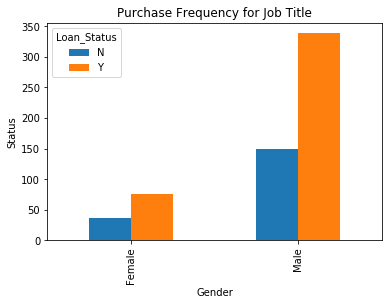

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,5446.460123,1742.932352,149.265957,339.665272,0.847007


In [42]:
pd.crosstab(df_t.Gender,df_t.Loan_Status).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Gender')
plt.ylabel('Status')
plt.show()
df_t.groupby('Gender').mean()

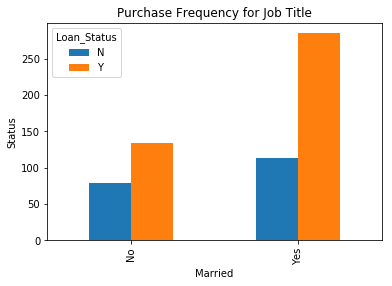

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Married,,,,,
No,4970.384977,1316.558685,128.883495,351.115385,0.839196
Yes,5629.173367,1794.632965,155.750000,336.987147,0.842541


In [43]:
pd.crosstab(df_t.Married,df_t.Loan_Status).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Married')
plt.ylabel('Status')
plt.show()
df_t.groupby('Married').mean()

### Numerically Dependent Variables 

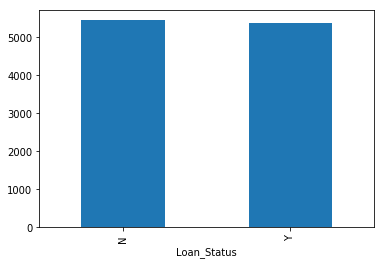

In [70]:
df_t.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

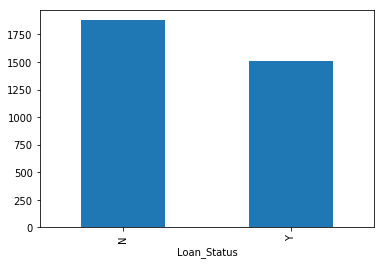

In [71]:
df_t.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

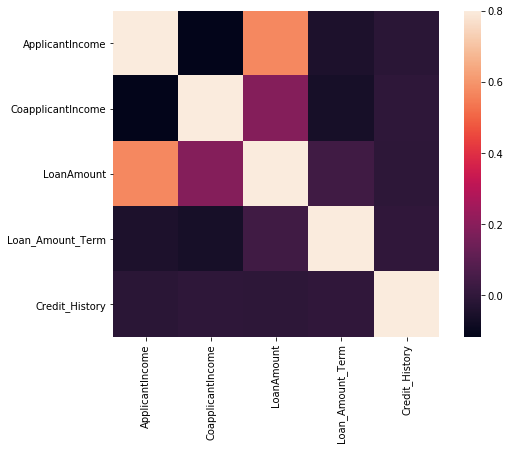

In [77]:
matrix = df_t.corr() 
plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True);

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

## Univariate Analysis  *--> w.r.t Itself*

kurtosis ---> 84.95638421103374
Skewness ---> 7.491531216657306


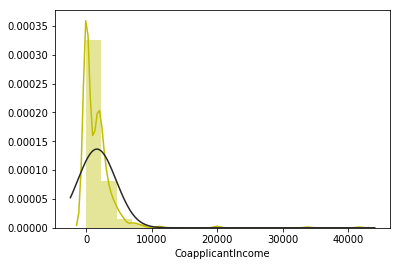

In [65]:
from scipy.stats import norm
import seaborn as sns
sns.distplot(df_t['CoapplicantIncome'], hist=True,bins=int(90/5), fit=norm , color="y")

print('kurtosis ---> ' + str(df_t['CoapplicantIncome'].kurtosis()))
print('Skewness ---> ' + str(df_t['CoapplicantIncome'].skew()))

Presence of two different modal distributions . one peaking at 0 and other at 5000 .  It is positively skewed and kutossed meaning 
there exists lot of  extreme values in positive to mean and 
The variance is simultaneously high over to the positive side of mean 

kurtosis ---> 60.54067593369113
Skewness ---> 6.539513113994625


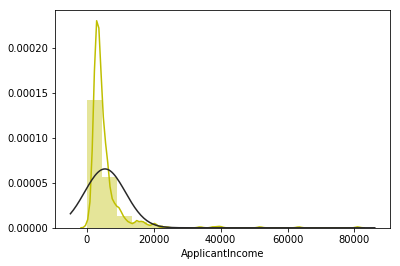

In [67]:

from scipy.stats import norm
import seaborn as sns
sns.distplot(df_t['ApplicantIncome'], hist=True,bins=int(90/5), fit=norm , color="y")
print('kurtosis ---> ' + str(df_t['ApplicantIncome'].kurtosis()))
print('Skewness ---> ' + str(df_t['ApplicantIncome'].skew()))

Presence of unimodal distributions . one peaking at 1500.  It is positively skewed and kutossed meaning 
there exists lot of  extreme values in positive to mean and 
The variance is simultaneously high over to the positive side of mean 

kurtosis ---> 6.673473692814259
Skewness ---> -2.362414124216269


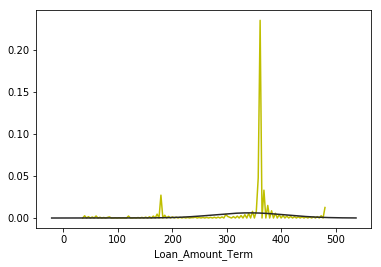

In [68]:
df=df_t.dropna()
from scipy.stats import norm
import seaborn as sns
sns.distplot(df['Loan_Amount_Term'], hist=False,bins=int(90/5), fit=norm , color="y")
print('kurtosis ---> ' + str(df_t['Loan_Amount_Term'].kurtosis()))
print('Skewness ---> ' + str(df_t['Loan_Amount_Term'].skew()))

Presence of ultiple peak distributions . one peaking at 350.  It is negatively skewed and  low kutossed meaning 
there exists lot of  extreme values in negative to mean and 
The variance is simultaneously high over to the negative side of mean 

kurtosis ---> 10.40153349029416
Skewness ---> 2.677551679256059


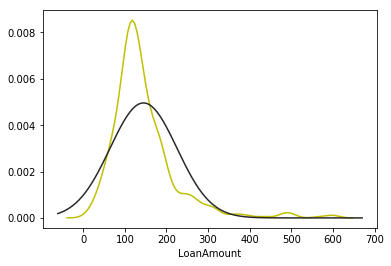

In [69]:
df=df_t.dropna()
from scipy.stats import norm
import seaborn as sns
sns.distplot(df['LoanAmount'], hist=False,bins=int(90/5), fit=norm , color="y")
print('kurtosis ---> ' + str(df_t['LoanAmount'].kurtosis()))
print('Skewness ---> ' + str(df_t['LoanAmount'].skew()))

Presence of single peak distributions . one peaking at 150.  It is positively skewed and  low kutossed meaning 
there exists  extreme values in positive to mean and 
The variance is simultaneously high over to the positive side of mean 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


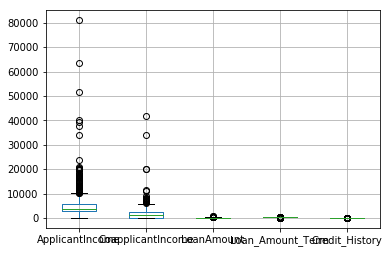

In [58]:

df_t.plot.box(grid='True')


The boxplot confirms the presence of a lot of outliers/extreme values, majorly in Aplicant Income and coapplicant Income

# Hypothesis

### 1. Credit History must be 1 for a Loan Sanction
### 2. Hiegher the Income of Coapplicant and applicant more chances of loan
### 3. Graduation increase chances of loan 
### 4. Non - Self Employed personals possed more chances of loan
### 5. Fewer Dependents increments chances of loan
### 6. Suburban and urban areas have better chances of loan

# Pre-Processing

In [0]:
def preprocess(df):
  numeric_variables = list(df.select_dtypes(include=['int64','float']).columns.values)
  df[numeric_variables]=df[numeric_variables].apply(lambda x: x.fillna(x.mean()),axis=0)
  categorical_variables = list(df.select_dtypes(exclude=['int64','float','bool']).columns.values)
  df[categorical_variables]=df[categorical_variables].apply(lambda x: x.fillna(x.mode()),axis=0)
  df = pd.get_dummies(df, prefix_sep="__",columns=categorical_variables)  
  return df